In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('E:/imdb_top_1000.csv')
df.drop(['Poster_Link','Certificate','Overview','Star1','Star2','Star3','Star4'],axis=1,inplace=True)
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.3,80.0,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,"4,360,000"


# Find movies having runtime greater than or equal to 180 minutes

In [6]:
df[(df['Runtime'].str.replace(' min','',regex=True).astype(int))>=180]['Series_Title']

3                             The Godfather: Part II
5      The Lord of the Rings: The Return of the King
7                                   Schindler's List
25                                    The Green Mile
31                              Shichinin no samurai
59                                 Avengers: Endgame
71                       Once Upon a Time in America
116                               Lawrence of Arabia
139                               Bhaag Milkha Bhaag
140                               Gangs of Wasseypur
147                          The Wolf of Wall Street
156                           Swades: We, the People
177                                           Sholay
206                                       Kis Uykusu
240                                   Dil Chahta Hai
247                Lagaan: Once Upon a Time in India
258                      Dilwale Dulhania Le Jayenge
274                              Fanny och Alexander
278                                  The Deer 

# Display years having highest average number of votes

In [7]:
df.groupby('Released_Year')['No_of_Votes'].mean().sort_values(ascending=False)

Released_Year
1994    666532.153846
1977    556087.333333
1999    536961.058824
2008    444044.904762
2010    431661.173913
            ...      
1928     38940.500000
1947     37204.500000
1945     34575.000000
1937     33829.000000
1932     33714.500000
Name: No_of_Votes, Length: 100, dtype: float64

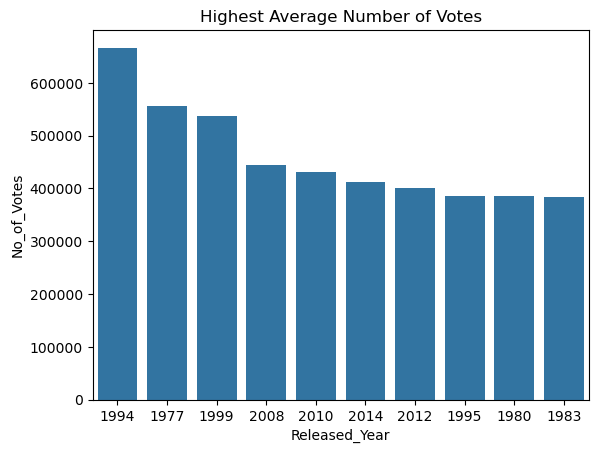

In [8]:
sns.barplot(df.groupby('Released_Year')['No_of_Votes'].mean().sort_values(ascending=False).head(10))
plt.title('Highest Average Number of Votes')
plt.show()

# Directors having highest average Meta Score

In [11]:
df.groupby('Director')['Meta_score'].mean().dropna().sort_values(ascending=False).head(10)

Director
Orson Welles            99.5
Charles Laughton        99.0
Michael Curtiz          98.5
Joseph L. Mankiewicz    98.0
Guillermo del Toro      98.0
Fritz Lang              98.0
Cristian Mungiu         97.0
Sergei M. Eisenstein    97.0
Sam Peckinpah           97.0
Jules Dassin            97.0
Name: Meta_score, dtype: float64

# Movies with the Highest Runtime

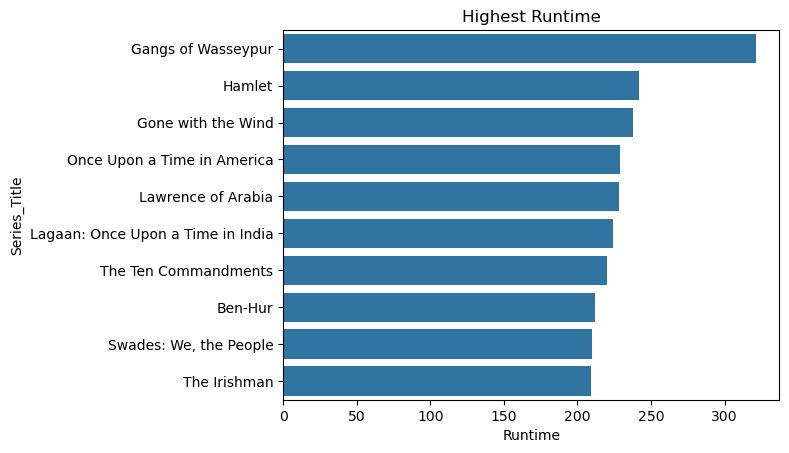

In [9]:
df['Runtime']=df['Runtime'].str.replace(' min','',regex=True).astype(int)
top_10=df.nlargest(10,'Runtime')[['Series_Title','Runtime']].set_index('Series_Title')
sns.barplot(x='Runtime',y=top_10.index,data=top_10)
plt.title('Highest Runtime')
plt.show()

# Number of movies per year

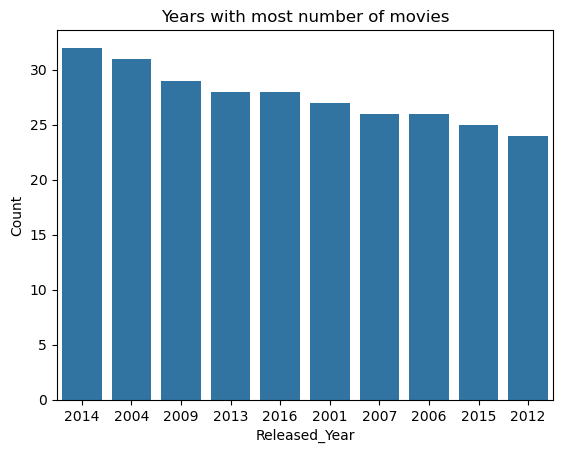

In [12]:
top_10=df['Released_Year'].value_counts().head(10).reset_index()
top_10.columns = ['Released_Year','Count']
sns.barplot(x='Released_Year',y='Count',data=top_10)
plt.title('Years with most number of movies')
plt.show()

# Movie with the highest revenue

In [14]:
df['Gross']=df['Gross'].str.replace(',','').astype(float)
df[df['Gross'].max()==df['Gross']]['Series_Title']

477    Star Wars: Episode VII - The Force Awakens
Name: Series_Title, dtype: object

# Top 10 movies with the highest Rating and their directors

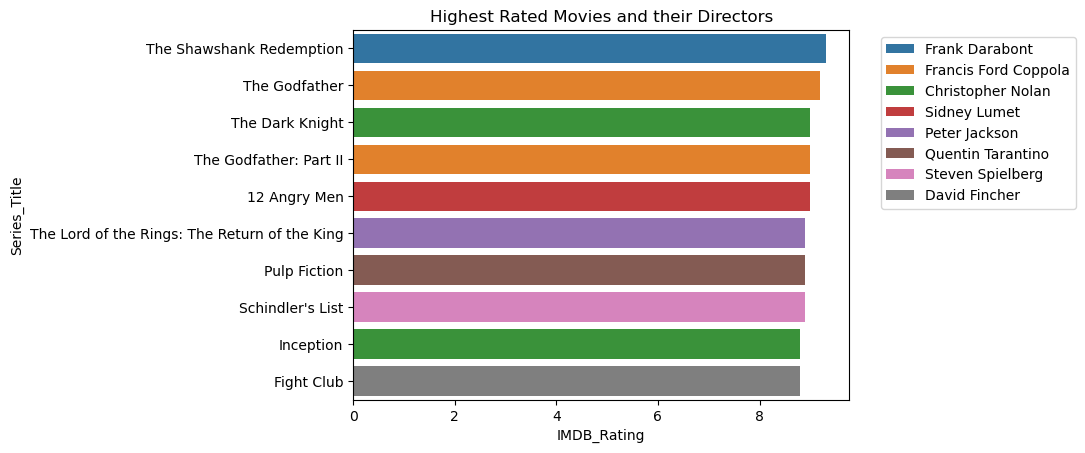

In [21]:
top_10_movies = df.nlargest(10,'IMDB_Rating')[['Series_Title','Director','IMDB_Rating']].set_index('IMDB_Rating')
sns.barplot(x=top_10_movies.index,y='Series_Title',data=top_10_movies,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Highest Rated Movies and their Directors')
plt.show()

# Displaying Top 10 highest revenue movie title

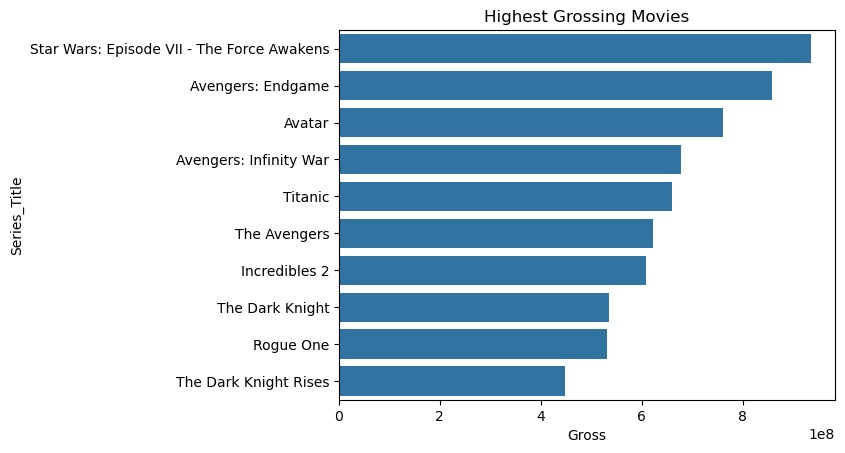

In [23]:
top_10_revenue = df.nlargest(10,'Gross')[['Series_Title','Gross']].set_index('Gross')
sns.barplot(x=top_10_revenue.index,y='Series_Title',data=top_10_revenue)
plt.title('Highest Grossing Movies')
plt.show()

# Average rating of movies year wise

In [24]:
df.groupby('Released_Year')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)

Released_Year
1936    8.500000
1921    8.300000
1957    8.277778
1994    8.238462
1942    8.233333
1931    8.200000
1924    8.200000
1927    8.200000
1954    8.166667
1941    8.150000
Name: IMDB_Rating, dtype: float64

# Does rating affect the revenue

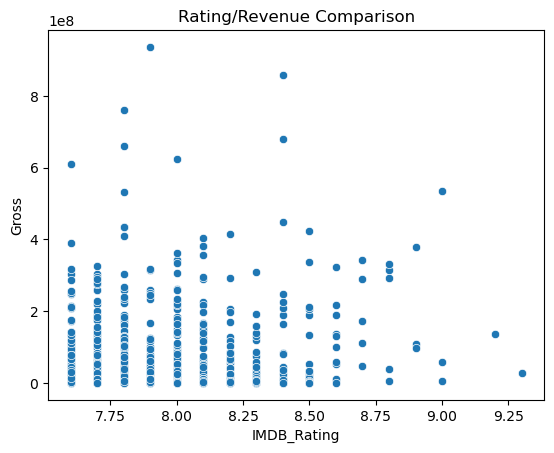

In [26]:
sns.scatterplot(x='IMDB_Rating',y='Gross',data=df)
plt.title('Rating/Revenue Comparison')
plt.show()

# Classifying movies based on ratings

In [28]:
def rating(rating):
    if rating>=9.0:
        return 'Worth Watching'
    elif rating>=8.0:
        return 'Excellent'
    elif rating>=7.0:
        return 'Good'
    elif rating>=6.0:
        return 'Average'
    else:
        return 'Not recommended'

df['Review']=df['IMDB_Rating'].apply(rating)
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross,Review
0,The Shawshank Redemption,1994,142,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0,Worth Watching
1,The Godfather,1972,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0,Worth Watching
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0,Worth Watching
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0,Worth Watching
4,12 Angry Men,1957,96,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0,Worth Watching


# Count number of action movies

In [29]:
len(df[df['Genre'].str.contains('Action',case=False)])

189

# All Genres in this dataset

In [30]:
unique_genres = set()
for genres in df['Genre']:
    genre_list = genres.split(',')
    for genre in genre_list:
        cleaned_genre = genre.strip()
        unique_genres.add(cleaned_genre)
print(unique_genres)

{'Comedy', 'Mystery', 'Family', 'Horror', 'Sci-Fi', 'Animation', 'History', 'Western', 'Sport', 'Musical', 'Romance', 'Action', 'Crime', 'Thriller', 'Music', 'Drama', 'War', 'Film-Noir', 'Fantasy', 'Biography', 'Adventure'}
